#### This model is to use existing company starting time with ARIMA (autoregression intergrated moving average) model to predict future company new location 

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from numpy import log
import pandas as pd
import os
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf


In [124]:
#  Load data
df = pd.read_csv('HoustonData/zip_1_new.csv', parse_dates=['date'], index_col='date' )
# df.head()

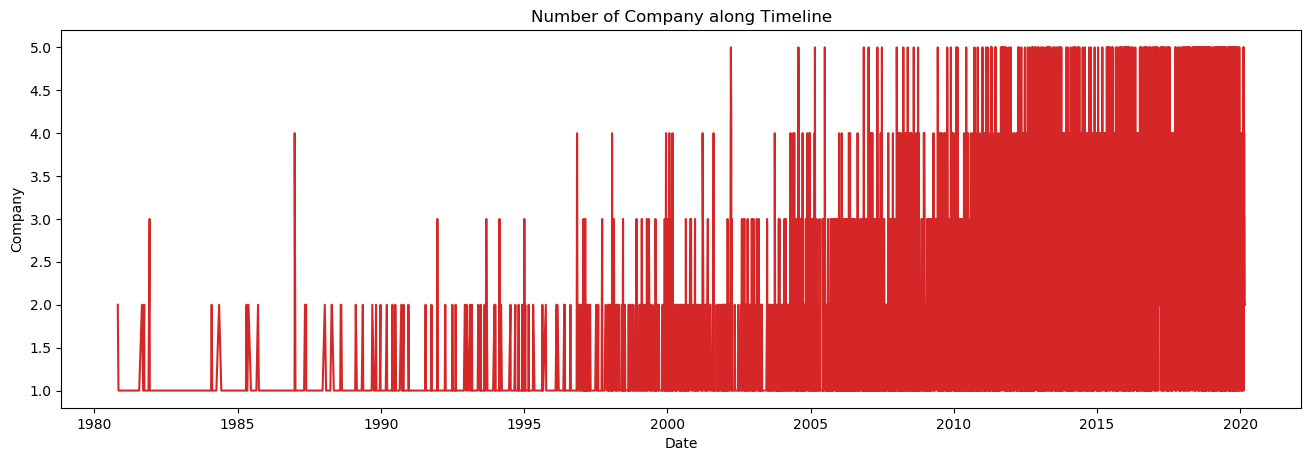

In [21]:
# Visualizing original time series
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Company', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df['value'], title='Number of Company along Timeline') 

In [22]:
# 4 Use the augmented Dickey Fuller teest to determine the minimum number of differencing d value for ARIMA model
result = adfuller(df.value)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.944130
p-value: 0.040452


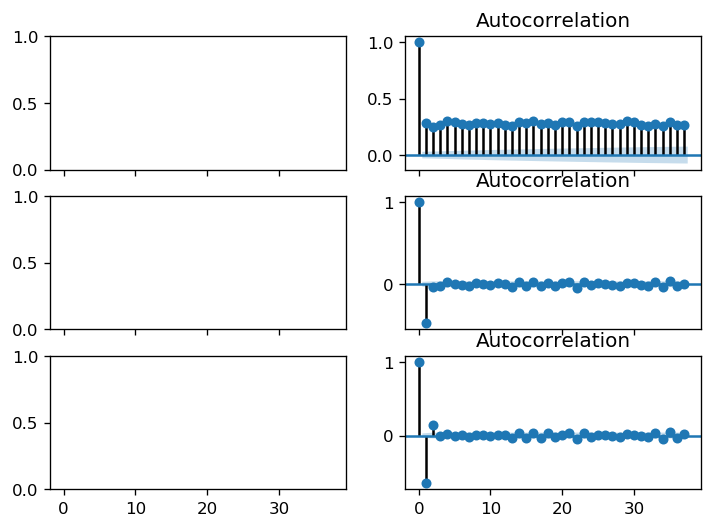

In [120]:
# import numpy as np, pandas as pd
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# 5 Find the order of the AR term (p)
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':120})

# Import data
df = pd.read_csv('HoustonData/zip_1_new.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
# axes[0, 0].plot(df.value) 
# axes[0, 0].set_title('Original Series')
# ax[0, 0].set_title('Original Series')
# plt.gca().plot(df.value) 
# plt.gca().set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# # 1st Differencing
# axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# # 2nd Differencing
# axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [24]:
# 5 Use number of difference test package to test if our time series stationary
from pmdarima.arima.utils import ndiffs
df = pd.read_csv('HoustonData/zip_1_new.csv', names=['value'], header=0)
y = df.value

# Adf Test
ndiffs(y, test='adf')  # 2

# KPSS test
ndiffs(y, test='kpss')  # 0

# PP test:
ndiffs(y, test='pp')  # 2

0

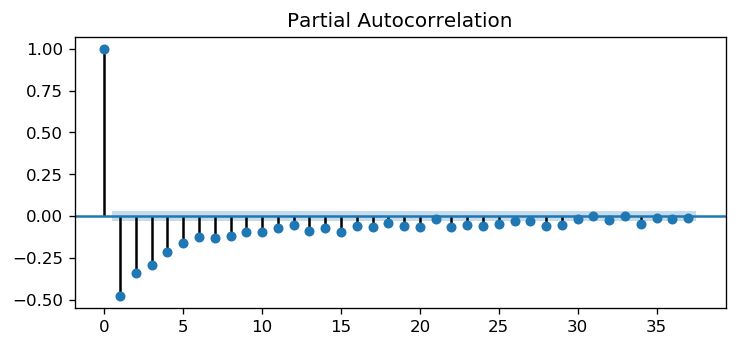

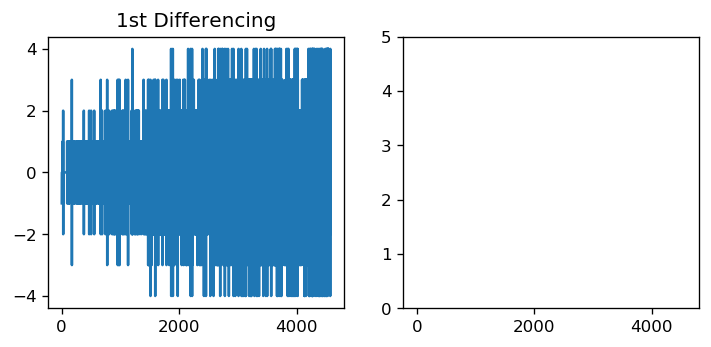

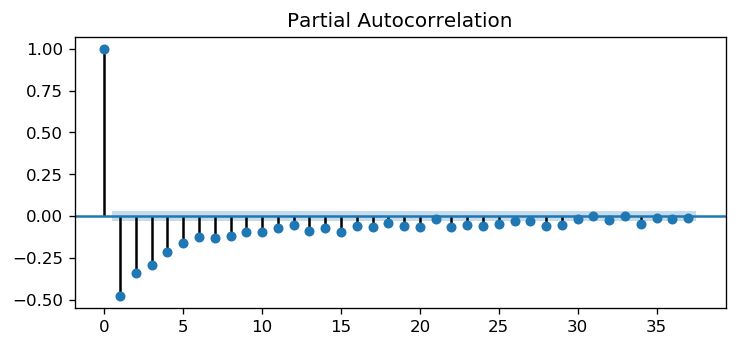

In [46]:
# 6 PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna())

# plt.show()

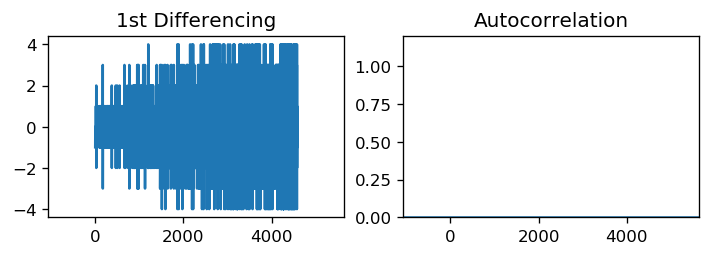

In [64]:
# 7 Find the order of the MA term (q)
plt.rcParams.update({'figure.figsize':(7,2), 'figure.dpi':120})

# Import data
df = pd.read_csv('HoustonData/zip_1_new.csv')

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff(), ax=axes[1])

plt.show()

In [88]:
# 9 Building ARIMA model1, d=0, AR=0, MA=0
model = ARIMA(df.value, order=(0,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                 4581
Model:                     ARMA(0, 0)   Log Likelihood               -7475.841
Method:                           css   S.D. of innovations              1.237
Date:                Sun, 29 Mar 2020   AIC                          14955.682
Time:                        12:11:14   BIC                          14968.542
Sample:                             0   HQIC                         14960.210
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0057      0.018    109.709      0.000       1.970       2.042


In [90]:
# 9 Building ARIMA model2, d=1, AR=0, MA=0, 
model = ARIMA(df.value, order=(1,0,0))   # error: The computed initial MA coefficients are not invertible
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                 4581
Model:                     ARMA(1, 0)   Log Likelihood               -7285.893
Method:                       css-mle   S.D. of innovations              1.187
Date:                Sun, 29 Mar 2020   AIC                          14577.785
Time:                        12:11:39   BIC                          14597.074
Sample:                             0   HQIC                         14584.576
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.0057      0.024     82.105      0.000       1.958       2.054
ar.L1.value     0.2821      0.014     19.903      0.000       0.254       0.310
                                    Roots       

In [91]:
# 9 Building ARIMA model3, d=1, AR=1, MA=0
model = ARIMA(df.value, order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                 4580
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -7708.267
Method:                       css-mle   S.D. of innovations              1.302
Date:                Sun, 29 Mar 2020   AIC                          15422.534
Time:                        12:13:37   BIC                          15441.822
Sample:                             1   HQIC                         15429.324
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.063e-05      0.013      0.005      0.996      -0.025       0.026
ar.L1.D.value    -0.4782      0.013    -36.855      0.000      -0.504      -0.453
                                    Root

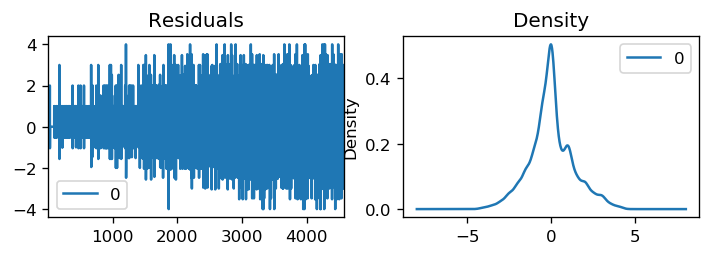

In [92]:
# 9 Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

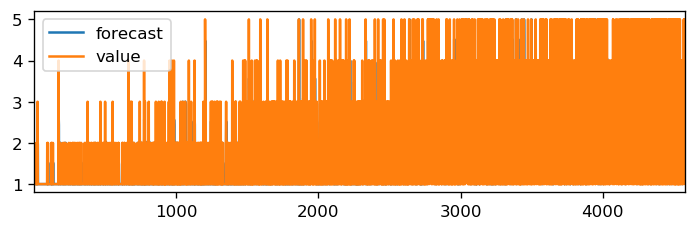

In [93]:
# 9. Actual vs Fitted predict plot
model_fit.plot_predict(dynamic=False)
plt.show()

C:\Users\foxru\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                 3581
Model:                     ARMA(1, 0)   Log Likelihood               -5193.406
Method:                       css-mle   S.D. of innovations              1.032
Date:                Sun, 29 Mar 2020   AIC                          10392.812
Time:                        15:29:54   BIC                          10411.362
Sample:                             0   HQIC                         10399.424
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.7591      0.023     76.323      0.000       1.714       1.804
ar.L1.value     0.2520      0.016     15.582      0.000       0.220       0.284
                                    Roots       

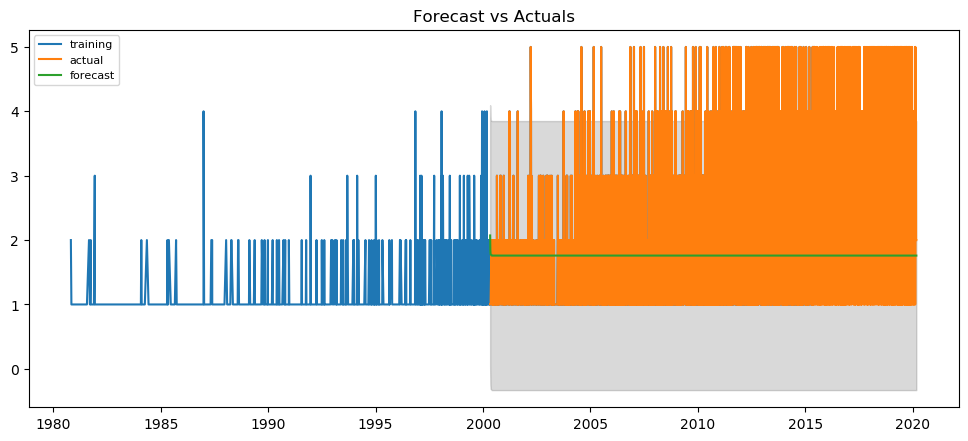

In [127]:
# 10 Create Training and Test set 
train = df.value[:3581]
test = df.value[1000:]

# Build training model1
model = ARIMA(train, order=(1, 0, 0))  
fitted = model.fit(disp=-1)
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(3581, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

C:\Users\foxru\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\foxru\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                 3580
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -5588.891
Method:                       css-mle   S.D. of innovations              1.153
Date:                Sun, 29 Mar 2020   AIC                          11183.782
Time:                        15:18:11   BIC                          11202.332
Sample:                             1   HQIC                         11190.395
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0005      0.013      0.035      0.972      -0.025       0.026
ar.L1.D.value    -0.4676      0.015    -31.653      0.000      -0.497      -0.439
                                    Root

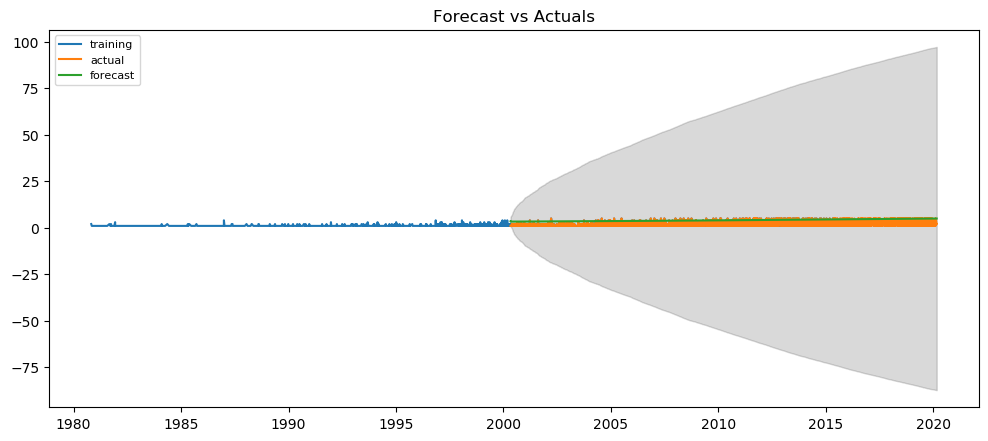

In [125]:
# 10 Create Training and Test set 
train = df.value[:3581]
test = df.value[1000:]

# Build training model1
model = ARIMA(train, order=(1, 1, 0))  
fitted = model.fit(disp=-1)
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(3581, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                 3580
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -5588.891
Method:                       css-mle   S.D. of innovations              1.153
Date:                Sun, 29 Mar 2020   AIC                          11183.782
Time:                        12:17:00   BIC                          11202.332
Sample:                             1   HQIC                         11190.395
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0005      0.013      0.035      0.972      -0.025       0.026
ar.L1.D.value    -0.4676      0.015    -31.653      0.000      -0.497      -0.439
                                    Root

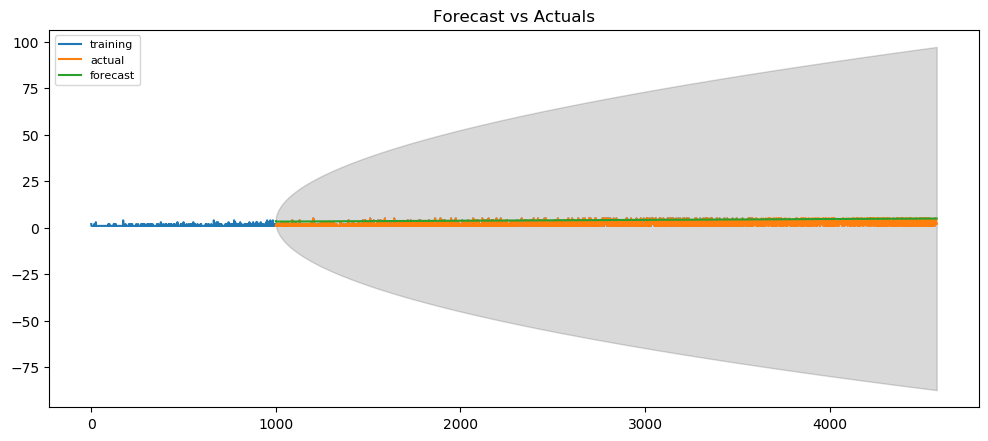

In [94]:
# 10 Create Training and Test set 
train = df.value[:3581]
test = df.value[1000:]

# Build training model1
model = ARIMA(train, order=(1, 1, 0))  
fitted = model.fit(disp=-1)
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(3581, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [95]:
# 11. Check model accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE Absolute Percentage Error
    me = np.mean(forecast - actual)             # ME--Mean Error
    mae = np.mean(np.abs(forecast - actual))    # MAE--Mean Absolute Error
    mpe = np.mean((forecast - actual)/actual)   # MPE--Mean Percentage Error
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE--Root Mean Squared Error
    corr = np.corrcoef(forecast, actual)[0,1]   # Correlation between the Actual and the Forecast
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax--Min-Max Error
    acf1 = acf(fc-test)[1]                      # ACF1--Lag 1 Autocorrelation Function Error
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

C:\Users\foxru\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


{'mape': 1.5037317491988982,
 'me': 1.8995080555356318,
 'mae': 1.9761550184456989,
 'mpe': 1.4880301638457654,
 'rmse': 2.228556225212792,
 'acf1': 0.010875473759001072,
 'corr': 0.4241031151495241,
 'minmax': 0.4842916485515396}

In [96]:
# 12 Use Auto Arima Forecast to get the best model
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

df = pd.read_csv('HoustonData/zip_1_new.csv', names=['value'], header=0)

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=13496.035, BIC=13521.754, Time=10.270 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=14955.682, BIC=14968.542, Time=0.262 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=14577.785, BIC=14597.074, Time=0.963 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=14679.971, BIC=14699.260, Time=0.992 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=20856.366, BIC=20862.796, Time=0.104 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=13506.253, BIC=13538.401, Time=13.910 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=13506.254, BIC=13538.402, Time=12.779 seconds
Near non-invertible roots for order (1, 0, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.990)
Fit ARIMA: (0, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=14566.471, BIC=14592.189, Time=1.855 sec

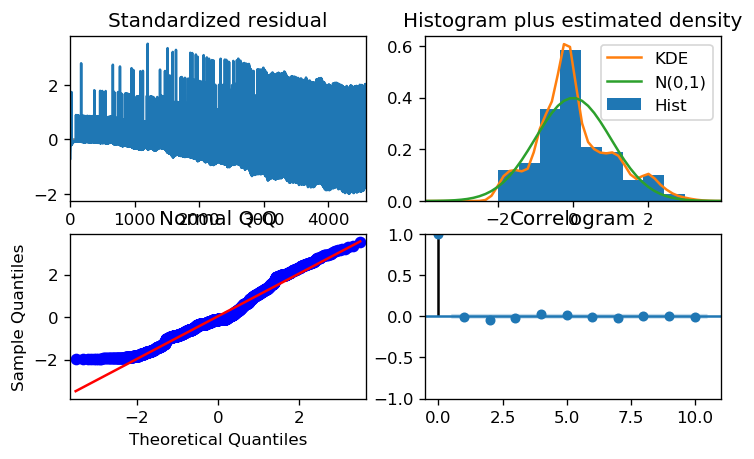

In [101]:
# 13. interpret the residual plots in ARIMA model
model.plot_diagnostics(figsize=(7,4))
plt.show()

### The interpretation of the plot diagnostics:

Top left:The residual errors seem to fluctuate around a mean of zero and have a uniform variance.
Top Right: The density plot suggest normal distribution with mean zero.
Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.
Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.
Overall, it seems to be a good fit. Let’s forecast.

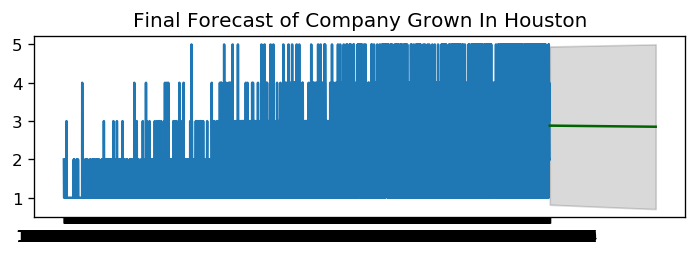

In [118]:
# 13 Final Forecast
n_periods = 1000
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Company Grown In Houston")
plt.show()

In [129]:
# # 13 Final Forecast with SARIMA model
# n_periods = 1000
# fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
# index_of_fc = pd.date_range((df.value).index[-1], periods = n_periods, freq='MS')

# # make series for plotting purpose
# fitted_series = pd.Series(fitted, index=index_of_fc)
# lower_series = pd.Series(confint[:, 0], index=index_of_fc)
# upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# # Plot
# plt.plot(df.value)
# plt.plot(fitted_series, color='darkgreen')
# plt.fill_between(lower_series.index, 
#                  lower_series, 
#                  upper_series, 
#                  color='k', alpha=.15)

# plt.title("SARIMA - Final Forecast of Company Grown In Houston")
# plt.show()